In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler,RobustScaler

In [40]:
#pd.set_option("display.max_columns",None)
#pd.set_option("display.max_rows",None)
#pd.set_option("display.float_format",lambda x: '%.3f' % x)
#pd.set_option("display.width", 500)

In [34]:
def load_application_train():
    data=pd.read_csv("application_train.csv")
    return data

In [35]:
def load():
    data=pd.read_csv("titanic.csv")
    return data

In [36]:
df=load()

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


## Aykırı degerleri yakalama

<Axes: xlabel='Age'>

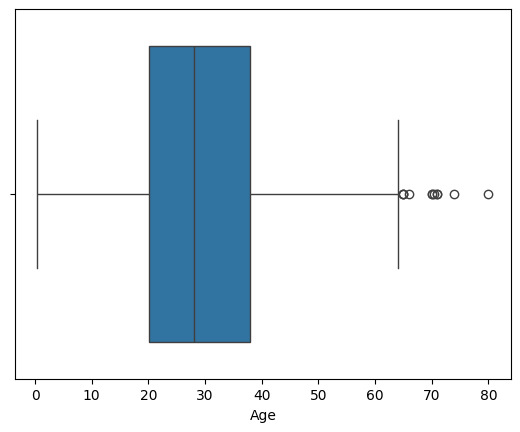

In [41]:
sns.boxplot(x=df["Age"])

## Aykırı degerleri yakalama
1-Eşik değerleri bulmak

In [42]:
q1=df["Age"].quantile(0.25)

In [43]:
q1 #ilk çeyrek

20.125

In [44]:
q3=df["Age"].quantile(0.75)

In [45]:
q3  #son çeyrek

38.0

In [47]:
iqr=q3-q1
iqr #IQR

17.875

In [51]:
up=q3+1.5*iqr  #upper whisker
low=q1-1.5*iqr #lower whisker

In [53]:
print(up)
low #yaş - olamayacağı için bunu ciddiye almayız

64.8125


-6.6875

In [54]:
df[(df["Age"]<low) | (df["Age"]>up)] #bunlar aykırı degerler

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000,0,0,C.A. 24579,10.500,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000,0,0,PC 17754,34.654,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.000,0,0,336439,7.750,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.000,0,0,13509,26.550,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.000,0,0,PC 17609,49.504,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000,0,0,27042,30.000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.000,0,0,C.A. 24580,10.500,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.000,1,1,WE/P 5735,71.000,B22,S


In [55]:
df[(df["Age"]<low) | (df["Age"]>up)].index

Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [57]:
df[(df["Age"]<low) | (df["Age"]>up)].any(axis=None)  ## AYKIRI VAR MI YOK MU BAKAR

True

In [62]:
df[(df["Age"]<low)].any(axis=None) #DF nin içinde -6.6875 dan küçük yaş var mı??

False

1-)Esik deger belirlerndi
2-)Aykırı degerlere erisildi
3-)Hızlıca aykırı deger var mı kontrolu yapıldı 
TEK TEK DEGSİKLENLER İCİN YAPILMASI UZUN SÜRER
BU İSİ FONKSİYONLARSTIRMAMIZ GEREKİYOR

## Fonksiyonlastırma
1-) Esik Deger Belirleme

In [72]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [76]:
low,up=outlier_thresholds(df, "Age")

In [75]:
outlier_thresholds(df,"Fare")

(-26.724, 65.6344)

In [77]:
print(low,up)

-6.6875 64.8125


In [80]:
df[(df["Age"]<low) | (df["Age"]>up)].index

Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

2-)Aykırı deger var mı meselesi

In [84]:
def chech_outlier(dataframe,col_name):
    low_limit,up_limit=outlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name]>up_limit) | (dataframe[col_name]<low_limit)].any(axis=None):
        return True
    else:
        return False

In [85]:
chech_outlier(df,"Age")

True

In [86]:
chech_outlier(df,"Fare")

True

3-) Veri seti içindeki sayısal değişkenlerin tümüne bu işlemi uygulama(Fonksiyonel Preproscessing, Scriptlevel preprossesnng)

In [102]:
def grab_col_names(dataframe,cat_th=10,car_th=20):
    cat_cols=[col for col in dataframe.columns if dataframe[col].dtypes=="O"] #tipi obcejt olanları al
    num_but_cat=[col for col in dataframe.columns if dataframe[col].nunique()<cat_th and
             dataframe[col].dtypes!="O"] #numerik görünen kategörikleri aldık
    cat_but_car=[col for col in dataframe.columns if dataframe[col].nunique()>car_th and
                dataframe[col].dtypes=="O"] #kategorik görünen kardinalleri aldık.
    
    cat_cols=cat_cols+num_but_cat #kategörikler güncellendi
    cat_cols=[col for col in cat_cols if col not in cat_but_car] #cat_cols içinde kardinalleri ayırdık
    
    num_cols=[col for col in dataframe.columns if dataframe[col].dtypes!="O"] #tipi objectden farkı olanları getir
    num_cols=[col for col in num_cols if col not in num_but_cat]
    
    print(f"Observations(Gözlem):{dataframe.shape[0]}")
    print(f"Variables(Öznitelik): {dataframe.shape[1]}")
    print(f"cat_cols:{len(cat_cols)}")
    print(f"num_cols:{len(num_cols)} ")
    print(f"cat_but_car:{len(cat_but_car)} ")
    print(f"num_but_cat:{len(num_but_cat)} ")
    
    return cat_cols,num_cols,cat_but_car

In [103]:
cat_cols,num_cols,cat_but_car=grab_col_names(df)

Observations(Gözlem):891
Variables(Öznitelik): 12
cat_cols:6
num_cols:3 
cat_but_car:3 
num_but_cat:4 


In [104]:
cat_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [105]:
num_cols #PassengerId hoşumuza gitmedi

['PassengerId', 'Age', 'Fare']

In [106]:
num_cols=[col for col in num_cols if col not in "PassengerId"]
print(num_cols)

['Age', 'Fare']


In [108]:
for col in num_cols:
    print(col,chech_outlier(df,col))  #içinde aykırı deger var mı yokmu çok hızlı bir şekilde baktık

Age True
Fare True


In [ ]:
#dff=load_application_train()
#cat_cols,num_cols,cat_but_car=grab_col_names(dff)
#for col in num_cols:
    #print(col,chech_outlier(dff,col))  

## Aykırı degerlere erişmek

In [114]:
def grab_outliers(dataframe,col_name,index=False):
    low,up=outlier_thresholds(dataframe,col_name)
    
    if dataframe[((dataframe[col_name]<low) | (dataframe[col_name]>up))].shape[0]>10:
        print(dataframe[((dataframe[col_name]<low)) | (dataframe[col_name]>up)].head())
    else:
        print(dataframe[((dataframe[col_name]<low)) | (dataframe[col_name]>up)])
        
    if index:
        outlier_index=dataframe[((dataframe[col_name]<low)| (dataframe[col_name]>up))].index
        return outlier_index

In [118]:
grab_outliers(df,"Age")

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


In [119]:
age_index=grab_outliers(df,"Age",True)

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


1-)Aykırı degeri fonksiyonla bulma\n
2-)Aykırı deger var mı sorusunu fonksiyonla bulma
3-)Aykırı degerleri fonksiyonla yakalama
4-)Kolonları türlerine göre getir